In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#"C:\Users\asus\CareerFoundry\Instacart Basket Analysis\02 Data\Prepared Data\orders_products_customer_merged.pkl"
path = r'C:\Users\asus\CareerFoundry\Instacart Basket Analysis'

In [4]:
ords_prods_cust_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customer_merged.pkl'))

In [5]:
ords_prods_cust_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [7]:
ords_prods_cust_merged['order_hour_of_day'].value_counts(dropna = False)

order_hour_of_day
10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: count, dtype: int64

# Histogram 

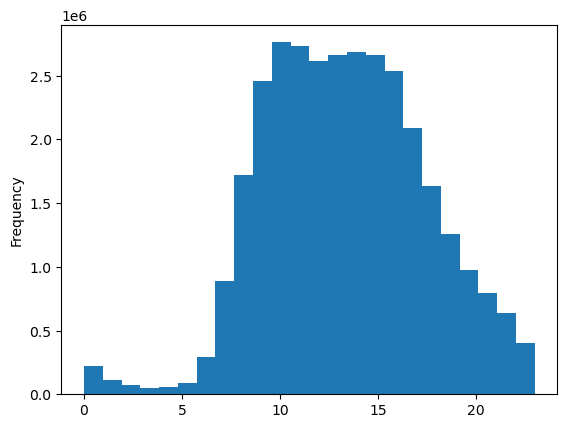

In [9]:
#hist = ords_prods_merge['prices'].plot.hist(bins = 25)
hist = ords_prods_cust_merged['order_hour_of_day'].plot.hist(bins = 24)

In [27]:
#bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_hour_of_day_hist.png'))

## This shows that the majority of the orders come in the middle of the day from about hour 9 to hour 17

# Bar graph

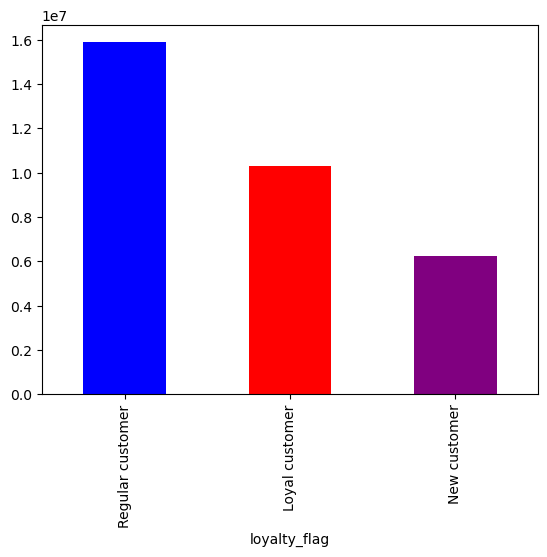

In [24]:
#ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()
#bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])
loyalty_bar = ords_prods_cust_merged['loyalty_flag'].value_counts().plot.bar(color =['blue', 'red', 'purple'])

In [25]:
#bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))
loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_flag_bar.png'))

# Line chart

In [14]:
np.random.seed(4)
#dev = np.random.rand(len(ords_prods_merge)) <= 0.7
dev = np.random.rand(len(ords_prods_cust_merged)) <= 0.8

In [15]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [16]:
big = ords_prods_cust_merged[dev]
small = ords_prods_cust_merged[~dev]

In [18]:
small.shape

(6481475, 35)

In [20]:
df = small[['order_hour_of_day', 'prices']]

In [21]:
df.head()

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
6,9,9.0
12,7,4.4
13,12,4.4


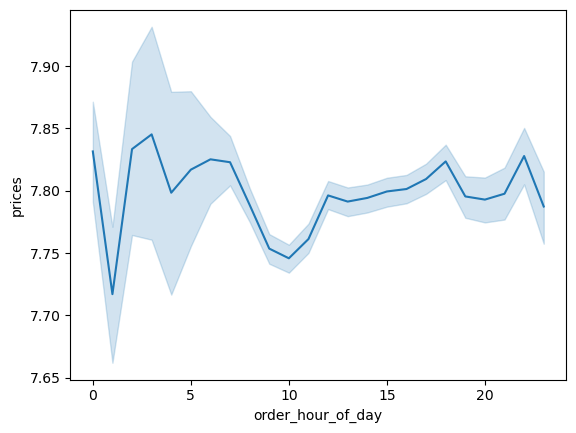

In [22]:
#line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')
line = sns.lineplot(data = df, x = 'order_hour_of_day', y = 'prices')

In [28]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hour_of_day_prices_line.png'))

# Line Chart on Age and number of dependants

In [31]:
df_2 = small[['age', 'number_of_dependants']]

In [32]:
df_2.head()

,age,number_of_dependants
0,31,3
2,31,3
6,31,3
12,31,3
13,31,3


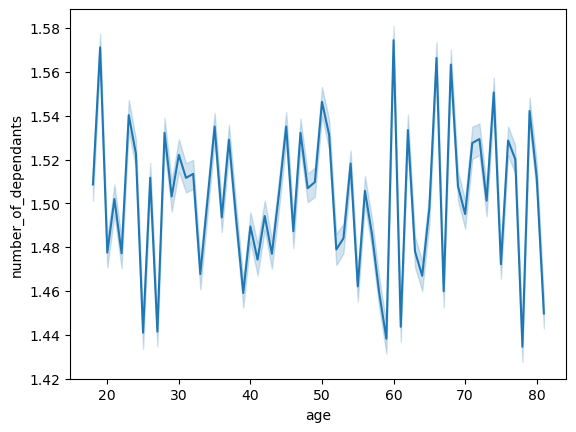

In [36]:
line_2 = sns.lineplot(data = df_2, x = 'age', y = 'number_of_dependants')

## There is no real correlation between age and the number of dependants, although there is more variability after the age of 60

In [43]:
line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_number_dependants_line.png'))

## Scatterplot

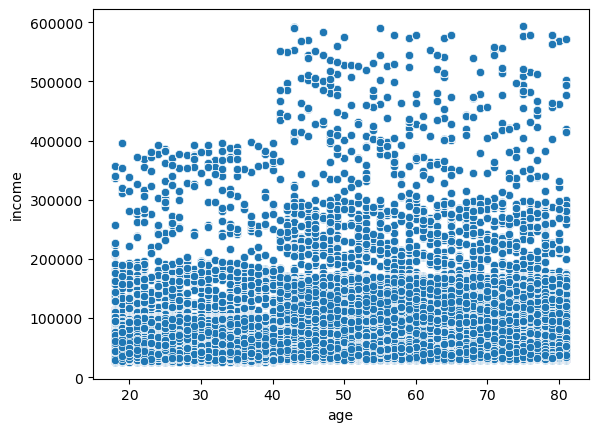

In [41]:
#sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge)
age_income_scatter= sns.scatterplot(x = 'age', y = 'income', data = small)

## Those age 40 and older appear to have a higher income

In [42]:
age_income_scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_income_scatter.png'))